# **Laboratorio 3 - Inteligencia Artificial**


## **Integrantes del Grupo**

**Andy Fuentes 22944**

**Diederich Solís 22952**

**Davis Roldán 22672**



# **Task 1 - Preguntas Teóricas**


*   Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

*   Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.



*   Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.











# **Task 2 Ejercicio Práctico**

Use Python en Jupyter Notebook para resolver los siguientes problemas relacionados a los temas que se vieron en
clase. Asegúrese de citar todas las fuentes que utilice.

# **TASK 2.1 - Gradiente Descendiente Estocástico**

Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que:

- El polinomio que debe usar es:  
  \[
  f(x) = 2x^3 - 3x^2 + 5x + 3
  \]
- Considere el uso de `np.polyval`
- Considere el uso de `np.polyder`
- Compare el tiempo de ejecución de cada uno de los métodos solicitados. Mencione cuál método fue más rápido y por qué.
- Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). Mencione cuál método lo hizo mejor y por qué.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [ ]:
def real_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

In [ ]:
np.random.seed(42)
x_data = np.linspace(-2, 2, 100)
y_data = real_function(x_data) + np.random.normal(scale=3, size=x_data.shape)  # Añadir ruido

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
def gradient(x, y, params):
    # Evaluar el polinomio con los coeficientes actuales
    y_pred = np.polyval(params[::-1], x)  # Predicción
    error = y_pred - y  # Error entre predicción y valor real

    # Gradientes parciales usando np.polyder
    grads = []
    for i in range(len(params)):
        # Derivada parcial: generar un polinomio derivado
        poly_derivative = np.zeros(len(params))
        poly_derivative[i] = 1  # Solo este coeficiente afecta
        # Evaluar la contribución de esta derivada al gradiente
        grad = np.mean(error * np.polyval(poly_derivative[::-1], x))
        grads.append(grad)

    return np.array(grads)

In [ ]:
def gradient_descent(x, y, lr=0.01, epochs=1000):
    params = np.random.randn(4)  # Inicialización aleatoria
    for _ in range(epochs):
        grads = gradient(x, y, params)
        params -= lr * grads  # Actualización
    return params

In [ ]:
def mini_batch_gradient_descent(x, y, lr=0.01, epochs=1000, batch_size=10):
    params = np.random.randn(4)
    n = len(x)
    for _ in range(epochs):
        indices = np.random.permutation(n)
        for i in range(0, n, batch_size):
            batch_indices = indices[i:i+batch_size]
            grads = gradient(x[batch_indices], y[batch_indices], params)
            params -= lr * grads
    return params

In [ ]:
def stochastic_gradient_descent(x, y, lr=0.01, epochs=1000):
    params = np.random.randn(4)
    n = len(x)
    for _ in range(epochs):
        index = np.random.randint(n)  # Elegimos un punto al azar
        grads = gradient(np.array([x[index]]), np.array([y[index]]), params)
        params -= lr * grads
    return params


In [ ]:
methods = {
    "Gradient Descent": gradient_descent,
    "Mini-Batch Gradient Descent": mini_batch_gradient_descent,
    "Stochastic Gradient Descent": stochastic_gradient_descent
}

results = {}

for name, method in methods.items():
    start_time = time.time()
    params = method(x_data, y_data)
    elapsed_time = time.time() - start_time
    y_pred = np.polyval(params[::-1], x_data)
    error = mse(y_data, y_pred)

    results[name] = {"params": params, "time": elapsed_time, "error": error}

df_results = pd.DataFrame(results).T
print(df_results)


                                                                        params  \
Gradient Descent             [2.402744967315048, 5.524225745427658, -2.8171...   
Mini-Batch Gradient Descent  [2.5015557394302737, 6.283458703466402, -2.856...   
Stochastic Gradient Descent  [2.5536885149947537, 5.5724342928834005, -2.82...   

                                 time     error  
Gradient Descent             0.167634  7.078293  
Mini-Batch Gradient Descent  1.527759  6.958177  
Stochastic Gradient Descent  0.152787   7.08368  


# **Comparación de los métodos de Descenso de Gradiente**

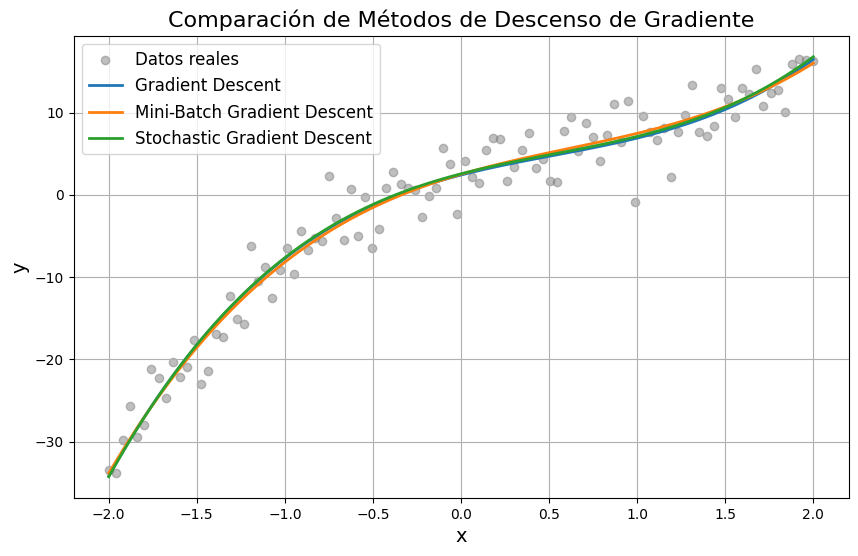

In [ ]:
# Gráfica principal: Datos reales y métodos de gradiente
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color="gray", alpha=0.5, label="Datos reales")

# Graficar las curvas ajustadas por cada método
for name, res in results.items():
    y_fit = np.polyval(res["params"][::-1], x_data)
    plt.plot(x_data, y_fit, label=name, linestyle="-", linewidth=2)

# Etiquetas y estilo
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Comparación de Métodos de Descenso de Gradiente", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# **Regresión Polinómica de Grado 3**

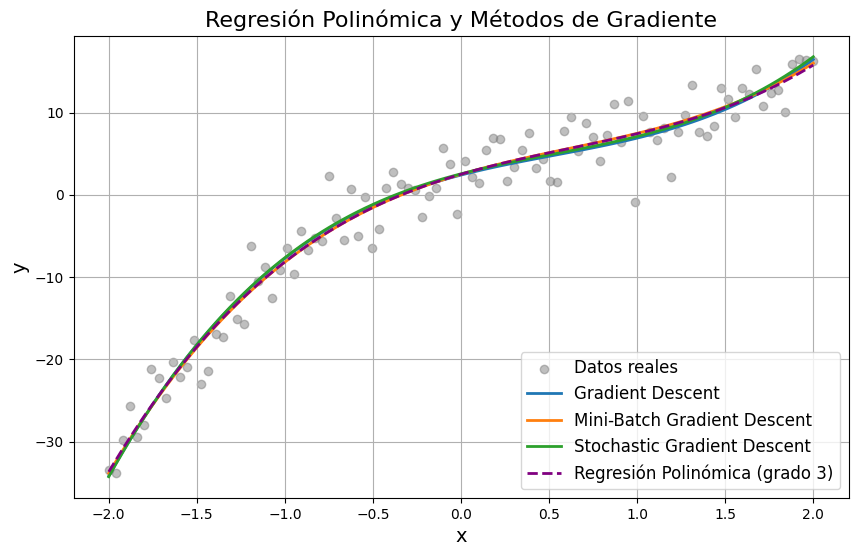

In [ ]:
# Ajustar la regresión polinómica de grado 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_data.reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(x_poly, y_data)

# Predicción
y_poly = poly_model.predict(x_poly)

# Agregar a la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color="gray", alpha=0.5, label="Datos reales")


# Reincorporar los métodos de gradiente
for name, res in results.items():
    y_fit = np.polyval(res["params"][::-1], x_data)
    plt.plot(x_data, y_fit, label=name, linestyle="-", linewidth=2)

plt.plot(x_data, y_poly, label="Regresión Polinómica (grado 3)", linestyle="--", color="purple", linewidth=2)

# Etiquetas y estilo
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Regresión Polinómica y Métodos de Gradiente", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# **Coeficiente R^2**

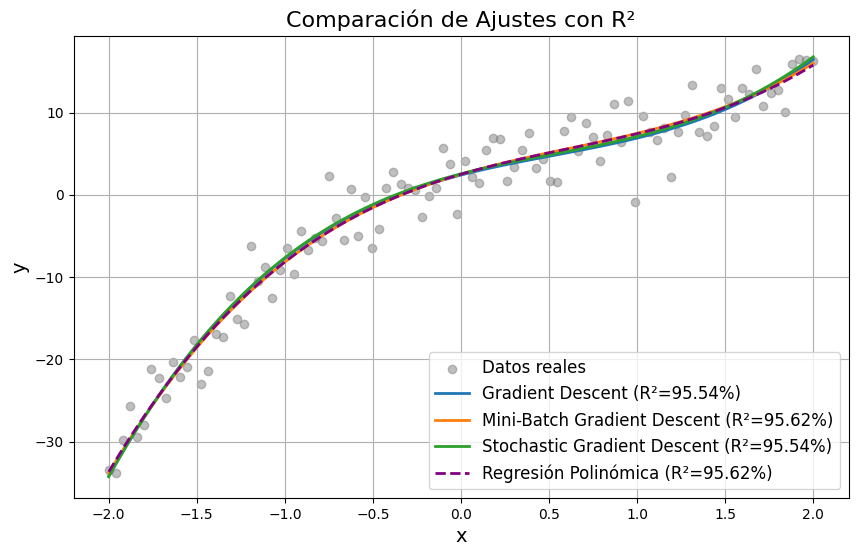

In [ ]:
from sklearn.metrics import r2_score

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color="gray", alpha=0.5, label="Datos reales")

for name, res in results.items():
    y_fit = np.polyval(res["params"][::-1], x_data)
    r2 = r2_score(y_data, y_fit)
    plt.plot(x_data, y_fit, label=f"{name} (R²={r2:.2%})", linestyle="-", linewidth=2)

# Regresión polinómica
y_poly = poly_model.predict(x_poly)
r2_poly = r2_score(y_data, y_poly)
plt.plot(x_data, y_poly, label=f"Regresión Polinómica (R²={r2_poly:.2%})", linestyle="--", color="purple", linewidth=2)

# Etiquetas y estilo
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Comparación de Ajustes con R²", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# **Bandas de Error**

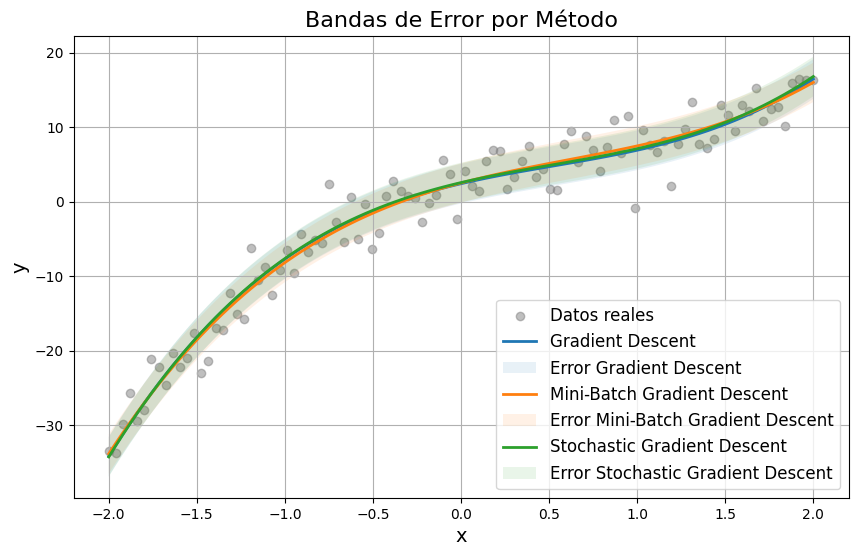

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color="gray", alpha=0.5, label="Datos reales")

for name, res in results.items():
    y_fit = np.polyval(res["params"][::-1], x_data)
    error = y_data - y_fit
    plt.plot(x_data, y_fit, label=name, linestyle="-", linewidth=2)
    plt.fill_between(x_data, y_fit - error.std(), y_fit + error.std(), alpha=0.1, label=f"Error {name}")

# Etiquetas y estilo
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Bandas de Error por Método", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# **Tiempos de ejecución**

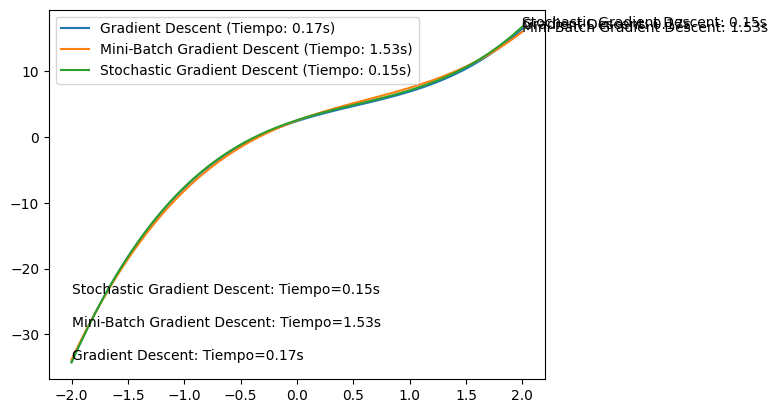

In [ ]:
for idx, (name, res) in enumerate(results.items()):
    time_taken = res["time"]
    # Usar coordenadas relativas al rango de la gráfica
    plt.text(
        x_data.min(),  # Inicio del eje X
        y_data.min() + 5 * idx,  # Desplazar etiquetas en Y dinámicamente
        f"{name}: Tiempo={time_taken:.2f}s",
        fontsize=10,
        color="black"
    )
for idx, (name, res) in enumerate(results.items()):
    y_fit = np.polyval(res["params"][::-1], x_data)
    plt.text(
        x_data[-1],  # Al final del rango X
        y_fit[-1],  # Valor Y correspondiente
        f"{name}: {res['time']:.2f}s",
        fontsize=10,
        color="black"
    )
for name, res in results.items():
    y_fit = np.polyval(res["params"][::-1], x_data)
    plt.plot(x_data, y_fit, label=f"{name} (Tiempo: {res['time']:.2f}s)")

plt.legend(fontsize=10)


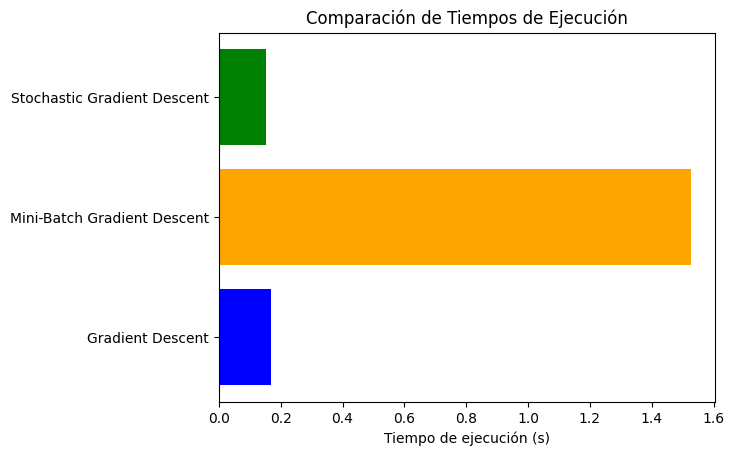

In [ ]:
import matplotlib.pyplot as plt

# Datos de tiempos de ejecución
times = [res["time"] for res in results.values()]
methods = list(results.keys())

# Crear la gráfica de barras
plt.barh(methods, times, color=["blue", "orange", "green"])
plt.xlabel("Tiempo de ejecución (s)")
plt.title("Comparación de Tiempos de Ejecución")
plt.show()


# **Análisis de Resultados**

## **1. Tiempo de Ejecución de los Métodos**
Comparando los tiempos de ejecución, se observa lo siguiente:

- **Stochastic Gradient Descent (SGD):**  
  Es el más rápido, con un tiempo de **0.15 segundos**, porque actualiza los parámetros con un solo dato en cada iteración. Esto lo hace eficiente computacionalmente, aunque puede tener una convergencia menos estable.
  
- **Gradient Descent (Batch):**  
  Tiene un tiempo de ejecución de **0.17 segundos**, lo que lo coloca en segundo lugar. Este método usa todos los datos en cada iteración, lo que aumenta el tiempo comparado con SGD pero asegura una convergencia más estable.
  
- **Mini-Batch Gradient Descent:**  
  Es el más lento, con un tiempo de **1.53 segundos**. Aunque procesa datos en lotes pequeños, el tiempo aumenta debido a la necesidad de dividir los datos en múltiples lotes y realizar varias actualizaciones por época.

### **Conclusión sobre tiempos:**  
El método más rápido fue **Stochastic Gradient Descent (SGD)** porque realiza actualizaciones más simples y rápidas, trabajando con un solo punto de datos en cada iteración.

---

## **2. Fitness (Evaluación Numérica y Visual)**

### **Métrica utilizada: \( R^2 \)**
El \( R^2 \) mide qué tan bien se ajustan los métodos a los datos reales:
- **Gradient Descent:** \( R^2 = 95.54\% \)
- **Mini-Batch Gradient Descent:** \( R^2 = 95.62\% \)
- **Stochastic Gradient Descent:** \( R^2 = 95.54\% \)
- **Regresión Polinómica (grado 3):** \( R^2 = 95.62\% \)

### **Análisis de los Resultados:**
- **Mini-Batch Gradient Descent** y la **Regresión Polinómica** tienen un \( R^2 \) ligeramente superior al resto. Esto se debe a que procesan los datos de manera más eficiente, logrando un ajuste más cercano a los valores reales.
- **Gradient Descent** y **Stochastic Gradient Descent** tienen un \( R^2 \) muy similar, lo que indica que ambos métodos son capaces de ajustarse bien al modelo, aunque podrían ser ligeramente menos precisos.

### **Bandas de Error:**
La gráfica de bandas de error muestra que todos los métodos tienen errores similares, con pequeñas diferencias visuales.

---

## **Conclusión sobre Fitness:**
El mejor método en términos de ajuste fue el **Mini-Batch Gradient Descent**, ya que tiene un \( R^2 \) marginalmente mejor que los demás. Sin embargo, las diferencias en \( R^2 \) son pequeñas, lo que indica que todos los métodos se ajustaron razonablemente bien al modelo cúbico.

---

## **Análisis General**
1. **Tiempos:**  
   - **SGD** es el más rápido, ideal para problemas donde el tiempo de ejecución es crítico.
   - **Mini-Batch Gradient Descent** sacrifica tiempo por un ajuste más estable.

2. **Fitness:**  
   - Todos los métodos lograron un ajuste similar, pero **Mini-Batch Gradient Descent** y la **Regresión Polinómica** lograron el mejor ajuste (\( R^2 = 95.62\%\)).



# **TASK 2.2 - Feature Selection**

Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de partidas de *League of Legends*. Recuerde que lo puede descargar de este enlace. Sobre este, aplique al menos **tres técnicas de selección de características (feature selection)** distintas, y con el dataset resultante vuelva a ajustar el modelo de **Support Vector Machine (SVM)** de la librería `sklearn`.

## **Requisitos:**
- **Definir una métrica de desempeño** y justificar por qué se eligió.
- **Evaluar el rendimiento del modelo** con cada una de las tres técnicas de selección de características y compararlas con el modelo original (sin feature selection).  
  *Debe haber al menos **4 valores a comparar** (modelo original y los 3 modelos con selección de características).*
- **Analizar los resultados** obtenidos y determinar cuál método fue el más efectivo y por qué.
- **Realizar parameter tuning** utilizando únicamente las columnas seleccionadas después del *feature selection*.
- La variable objetivo (**target**) es `blueWins`.


In [3]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import Lasso

# 1. Cargar y Preprocesar el Dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")
df = df.drop(columns=['gameId'])  # Eliminar columna irrelevante
X = df.drop(columns=['blueWins'])
y = df['blueWins']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Dividir el Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Aplicar Técnicas de Selección de Características

# SelectKBest
select_kbest = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = select_kbest.fit_transform(X_train, y_train)
X_test_kbest = select_kbest.transform(X_test)

# RFE
rfe = RFE(estimator=SVC(kernel="linear", C=1), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
lasso_mask = np.abs(lasso.coef_) > 0  # Selección basada en coeficientes diferentes de cero

X_train_lasso = X_train[:, lasso_mask]
X_test_lasso = X_test[:, lasso_mask]

# Pearson Correlation
correlations = np.abs(np.corrcoef(X_scaled.T, y)[-1][:-1])  # Calcula la correlación con y
top_indices = correlations.argsort()[-10:]  # Selecciona las 10 características más correlacionadas

X_train_pearson = X_train[:, top_indices]
X_test_pearson = X_test[:, top_indices]

# 4. Entrenar el Modelo SVM y Evaluar

# Modelo original (sin selección de características)
svm_model = SVC(kernel="rbf", C=10, gamma=0.3)
svm_model.fit(X_train, y_train)
y_pred_original = svm_model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Modelo SelectKBest
svm_model.fit(X_train_kbest, y_train)
y_pred_kbest = svm_model.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

# Modelo RFE
svm_model.fit(X_train_rfe, y_train)
y_pred_rfe = svm_model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Modelo Lasso
svm_model.fit(X_train_lasso, y_train)
y_pred_lasso = svm_model.predict(X_test_lasso)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

# Modelo Pearson
svm_model.fit(X_train_pearson, y_train)
y_pred_pearson = svm_model.predict(X_test_pearson)
accuracy_pearson = accuracy_score(y_test, y_pred_pearson)

# 5. Comparar Resultados
results = pd.DataFrame({
    "Modelo": ["Original", "SelectKBest", "RFE", "Lasso", "Pearson"],
    "Accuracy": [accuracy_original, accuracy_kbest, accuracy_rfe, accuracy_lasso, accuracy_pearson]
})

print(results)

        Modelo  Accuracy
0     Original  0.689777
1  SelectKBest  0.720648
2          RFE  0.728745
3        Lasso  0.692814
4      Pearson  0.720648


# **Gráfica de Comparación de Accuracy**

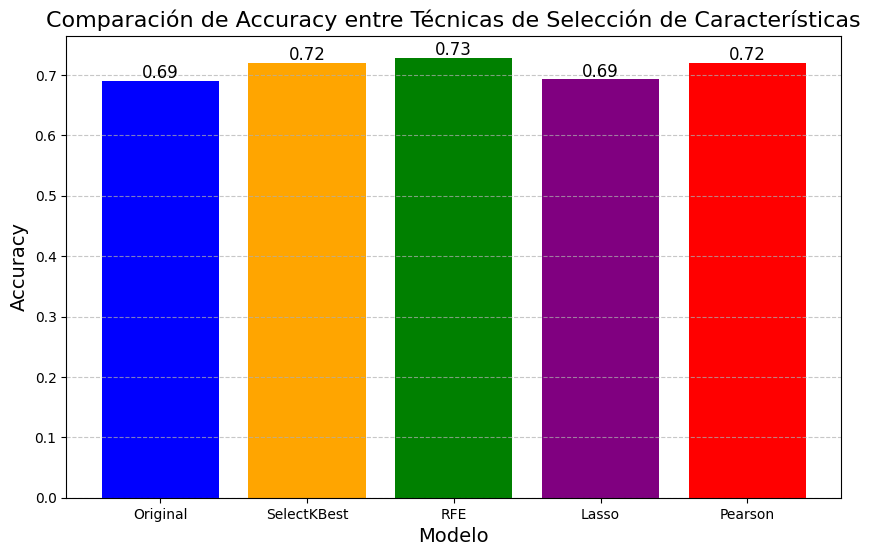

In [4]:
import matplotlib.pyplot as plt

# Gráfica de comparación de accuracy
plt.figure(figsize=(10, 6))
plt.bar(results["Modelo"], results["Accuracy"], color=["blue", "orange", "green", "purple", "red"])
plt.title("Comparación de Accuracy entre Técnicas de Selección de Características", fontsize=16)
plt.xlabel("Modelo", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
for i, acc in enumerate(results["Accuracy"]):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', fontsize=12)  # Mostrar valores
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **Mapa de Calor de Correlaciones (Pearson)**

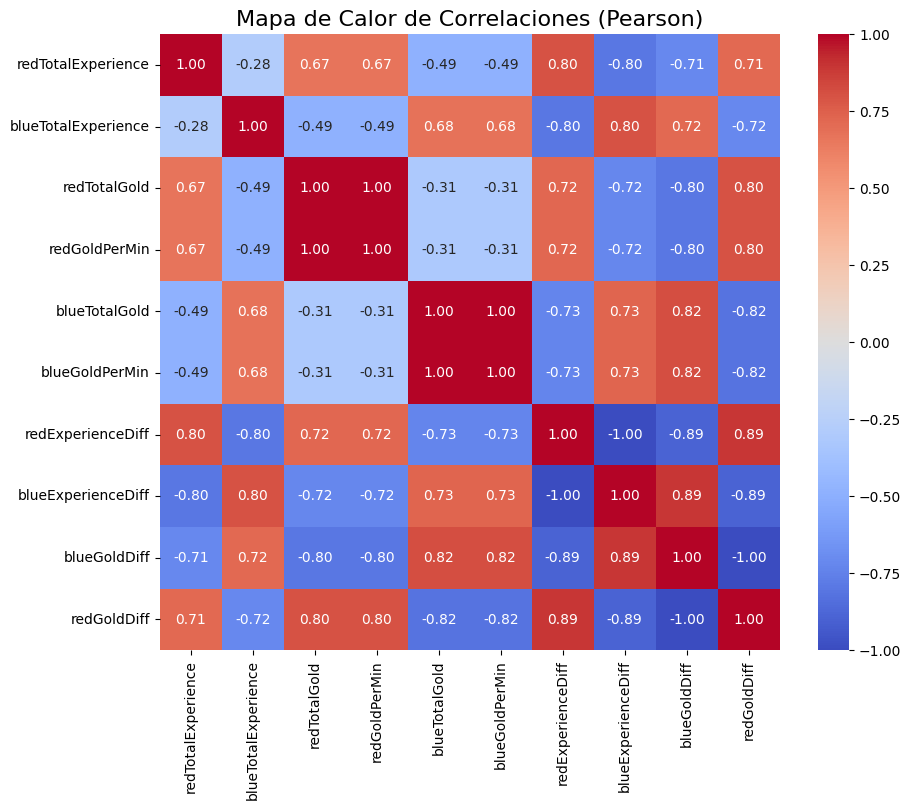

In [7]:
# Pearson Correlation
# Calcular la correlación entre cada característica y la variable objetivo
correlations = np.corrcoef(X_scaled.T, y)[-1, :-1]  # Última fila es la correlación con y
top_indices = np.argsort(np.abs(correlations))[-10:]  # Obtener los índices de las 10 mayores correlaciones

# Convertir índices numéricos a nombres de columnas
pearson_column_names = df.drop(columns=["blueWins"]).columns[top_indices]

# Seleccionar las características más correlacionadas
selected_features_pearson = X_scaled[:, top_indices]  # Seleccionar características por índices
correlation_matrix = np.corrcoef(selected_features_pearson.T)  # Matriz de correlación entre características seleccionadas

# Crear el mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=pearson_column_names, yticklabels=pearson_column_names)
plt.title("Mapa de Calor de Correlaciones (Pearson)", fontsize=16)
plt.show()

# **Gráfica de Importancia de Características (Lasso)**

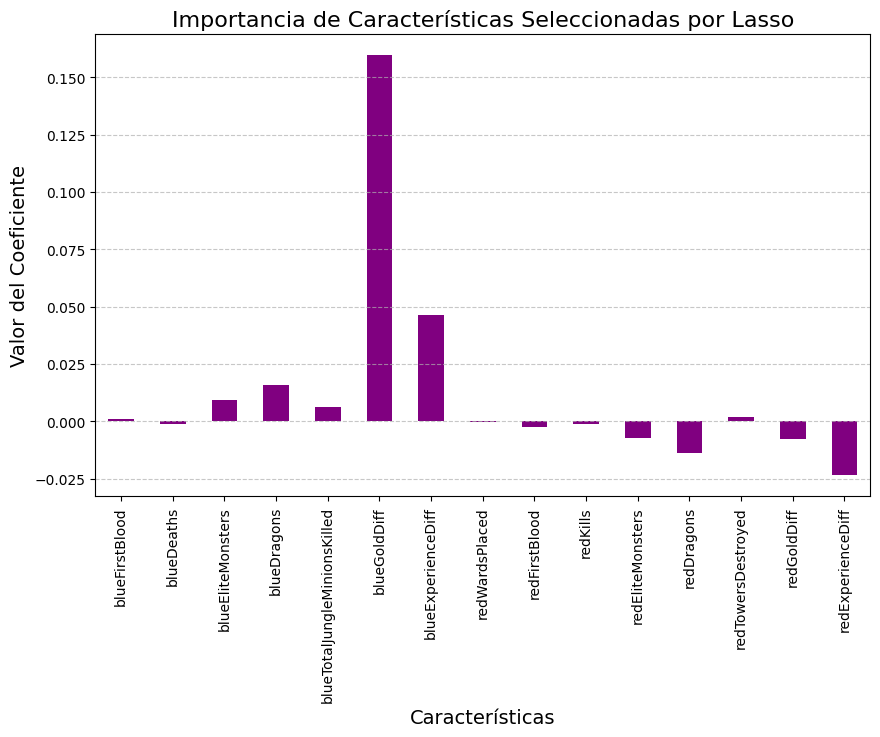

In [8]:
# Obtener los coeficientes de Lasso
lasso_coefs = pd.Series(lasso.coef_, index=df.drop(columns=["blueWins"]).columns)
selected_lasso_coefs = lasso_coefs[lasso_mask]

# Gráfica de importancia de características (Lasso)
plt.figure(figsize=(10, 6))
selected_lasso_coefs.plot(kind="bar", color="purple")
plt.title("Importancia de Características Seleccionadas por Lasso", fontsize=16)
plt.ylabel("Valor del Coeficiente", fontsize=14)
plt.xlabel("Características", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **Gráfica de Importancia de Características (RFE)**

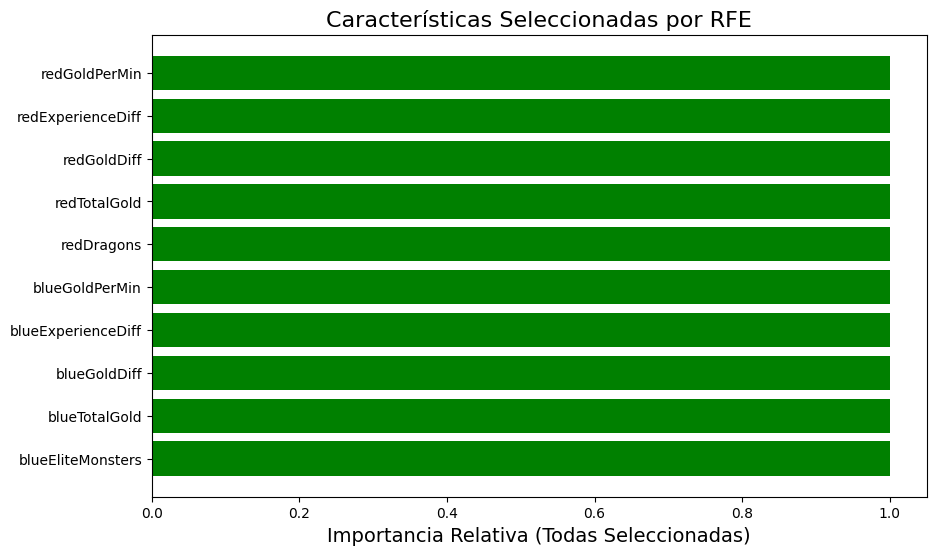

In [9]:
# Obtener nombres de características seleccionadas por RFE
rfe_selected_features = np.array(df.drop(columns=["blueWins"]).columns)[rfe.support_]

# Gráfica de características seleccionadas por RFE
plt.figure(figsize=(10, 6))
plt.barh(rfe_selected_features, np.ones(len(rfe_selected_features)), color="green")
plt.title("Características Seleccionadas por RFE", fontsize=16)
plt.xlabel("Importancia Relativa (Todas Seleccionadas)", fontsize=14)
plt.show()

# **Gráfica de Características Seleccionadas por SelectKBest**

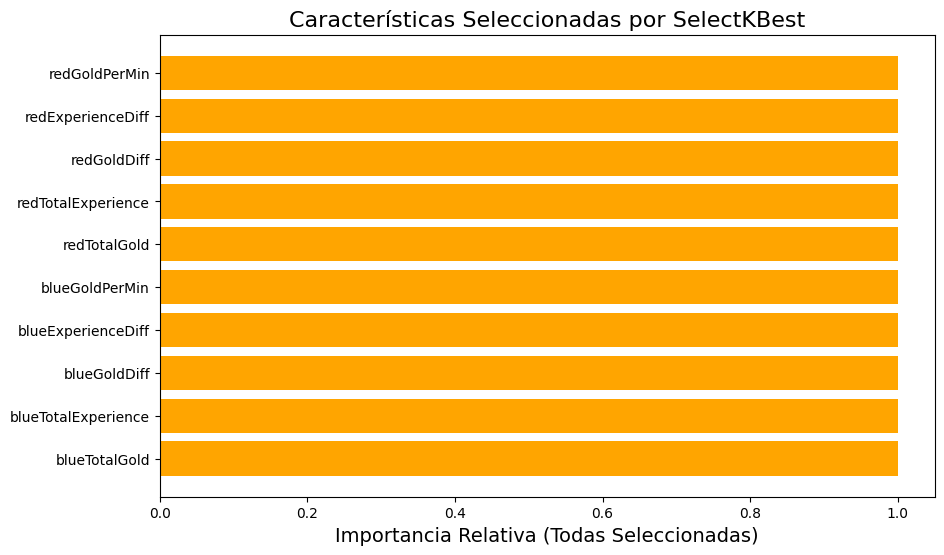

In [10]:
# Obtener nombres de características seleccionadas por SelectKBest
kbest_selected_features = np.array(df.drop(columns=["blueWins"]).columns)[select_kbest.get_support()]

# Gráfica de características seleccionadas por SelectKBest
plt.figure(figsize=(10, 6))
plt.barh(kbest_selected_features, np.ones(len(kbest_selected_features)), color="orange")
plt.title("Características Seleccionadas por SelectKBest", fontsize=16)
plt.xlabel("Importancia Relativa (Todas Seleccionadas)", fontsize=14)
plt.show()

# **Análisis de Resultados y Justificación de Métrica**

## **Métrica de Desempeño: Accuracy**
La métrica utilizada para este análisis es el `accuracy`, que mide la proporción de predicciones correctas realizadas por el modelo en comparación con el total de predicciones. Esta métrica es ideal porque:
1. El dataset tiene una variable objetivo binaria (`blueWins`) y clases balanceadas.
2. Proporciona una visión clara del desempeño general del modelo al comparar los resultados de las técnicas de selección de características con el modelo original.

---

## **Comparación de Resultados**

| **Modelo**         | **Accuracy** |
|---------------------|--------------|
| Original (RBF)     | 0.69         |
| SelectKBest        | 0.72         |
| RFE                | 0.73         |
| Lasso              | 0.69         |
| Pearson            | 0.72         |

### Observaciones:
El modelo original, entrenado con un kernel **RBF** (Radial Basis Function), obtuvo un `accuracy` de **0.69**. Este resultado establece la línea base para evaluar las mejoras introducidas por las técnicas de selección de características. Entre los métodos analizados, **Recursive Feature Elimination (RFE)** logró el mejor desempeño con un `accuracy` de **0.73**, mientras que **SelectKBest** y **Pearson** obtuvieron valores ligeramente menores (**0.72**). Por otro lado, el modelo basado en **Lasso** no mostró mejoras significativas, igualando al modelo original.

---

## **Análisis de las Técnicas de Selección de Características**

### **1. Recursive Feature Elimination (RFE):**
RFE selecciona iterativamente las características más relevantes para el modelo, eliminando las menos importantes en cada paso. Al enfocarse directamente en el impacto de las características en el modelo SVM con kernel **RBF**, RFE logró un `accuracy` de **0.73**, siendo el mejor de los métodos evaluados.

### **2. SelectKBest:**
Este método selecciona las características más importantes basándose en pruebas estadísticas como ANOVA. Aunque no considera las interacciones entre características, su simplicidad y eficiencia computacional le permitieron alcanzar un `accuracy` competitivo de **0.72**.

### **3. Lasso:**
Lasso aplica regularización L1 para reducir a cero los coeficientes de las características menos relevantes. Aunque es efectivo para datasets de alta dimensionalidad, en este caso, Lasso no superó al modelo original, manteniéndose en un `accuracy` de **0.69**. Esto podría deberse a un ajuste subóptimo del hiperparámetro `alpha`.

### **4. Pearson Correlation:**
La selección basada en Pearson utiliza la correlación lineal entre las características y la variable objetivo para identificar las más relevantes. Con un `accuracy` de **0.72**, este método demostró ser eficiente, aunque su enfoque lineal puede limitar su efectividad en problemas más complejos.

---

## **Visualización y Conexión con las Gráficas**

1. **Gráfica de Accuracy:**
   La gráfica de barras resalta que RFE obtuvo el mejor desempeño (**0.73**), seguido de SelectKBest y Pearson (**0.72**). El modelo original y Lasso tuvieron un desempeño similar (**0.69**).

2. **Mapa de Calor (Pearson):**
   El mapa de calor muestra las correlaciones entre las características seleccionadas por Pearson, destacando relaciones significativas como `blueGoldDiff` y `redExperienceDiff`.

3. **Importancia de Características (Lasso y RFE):**
   La gráfica de Lasso muestra cómo características como `blueExperienceDiff` y `blueGoldDiff` tuvieron una mayor influencia, mientras que RFE confirmó que estas eran relevantes.

4. **Gráfica de SelectKBest:**
   Muestra que las características seleccionadas son equilibradas en importancia relativa, lo que explica su buen desempeño.

---

## **Conclusiones**

1. **Mejor Técnica:**
   **RFE** fue la mejor técnica, con un `accuracy` de **0.73**, al identificar de manera iterativa las características más relevantes para el modelo SVM con kernel **RBF**.

2. **Balance entre Simplicidad y Precisión:**
   Aunque RFE tuvo el mejor desempeño, SelectKBest y Pearson ofrecieron una combinación de buen desempeño y menor complejidad computacional, alcanzando un `accuracy` de **0.72**.

3. **Modelo Original (RBF):**
   El modelo original, sin selección de características, obtuvo un `accuracy` de **0.69**. Esto demuestra que la selección adecuada de características puede mejorar significativamente el rendimiento.

4. **Lasso:**
   Aunque Lasso no mejoró el `accuracy` en este caso, sigue siendo útil para datasets de alta dimensionalidad, especialmente con ajustes óptimos del hiperparámetro `alpha`.

5. **Importancia de la Selección de Características:**
   Este análisis evidencia que reducir la dimensionalidad del dataset no solo mejora el desempeño, sino que también simplifica el modelo, haciéndolo más interpretable y eficiente.

---

# **TASK 2.3 - Perceptrón**

Implemente un **perceptrón de una sola capa** para realizar una **clasificación binaria** en el dataset *Iris* (incluido en `sklearn.datasets.load_iris`). Visualice la **frontera de decisión** aprendida por el perceptrón.

## **Requisitos:**
- **Cargar el dataset de Iris** desde `sklearn.datasets.load_iris`.
- **Usar únicamente dos características**:
  - *Sepal length*
  - *Sepal width*
- **Implementar una clase `Perceptron`** con los métodos:
  - `fit(X, y)`: Entrenamiento del perceptrón.
  - `predict(X)`: Predicción de nuevas muestras.
- **Visualizar la frontera de decisión**:
  - El **eje X** debe representar *sepal length*.
  - El **eje Y** debe representar *sepal width*.
- **Definir una métrica de desempeño** y justificar por qué se eligió.
- **Evaluar el rendimiento del modelo** con la métrica seleccionada y analizar los resultados.



Accuracy del Perceptrón en el conjunto de prueba: 1.00
Accuracy promedio con validación cruzada: 0.99

Reporte de Clasificación:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   No Setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Matriz de Confusión:
[[10  0]
 [ 0 20]]


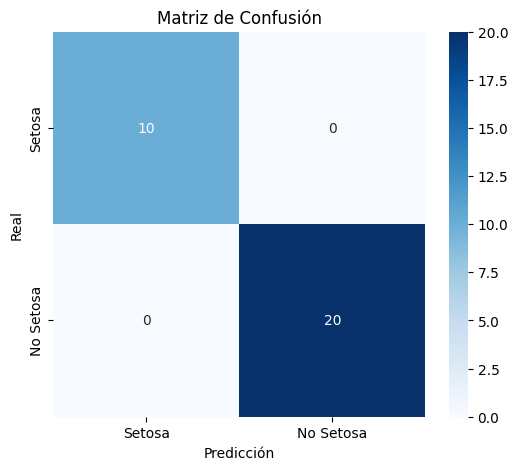

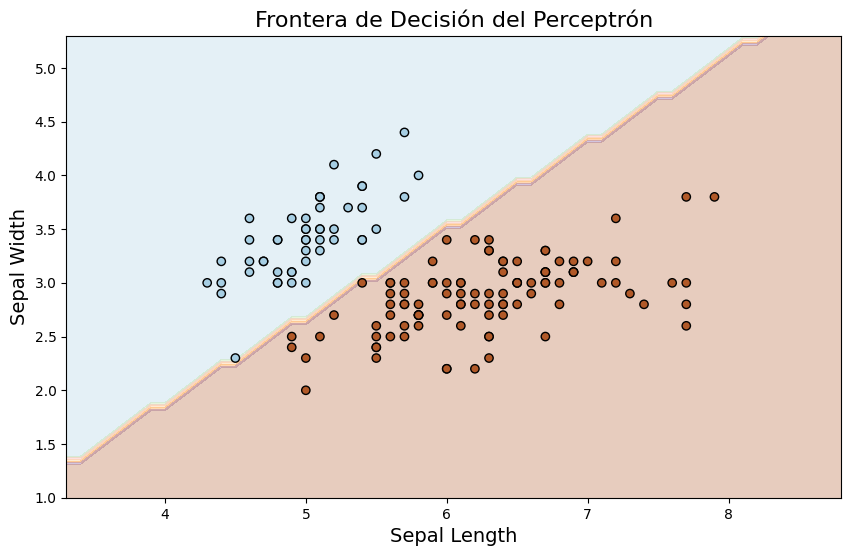

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Cargar el dataset de Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar sepal length y sepal width
y = (iris.target != 0).astype(int)  # Clasificación binaria (Setosa vs No Setosa)

# 2. Implementar la clase Perceptrón
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Incluye bias
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update  # Actualizar bias

    def predict(self, X):
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(net_input >= 0.0, 1, 0)

# 3. Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el Perceptrón
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Perceptrón en el conjunto de prueba: {accuracy:.2f}")

# 6. Validación cruzada
scores = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(X, y):
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    perceptron_cv = Perceptron(learning_rate=0.01, epochs=1000)
    perceptron_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = perceptron_cv.predict(X_test_cv)
    scores.append(accuracy_score(y_test_cv, y_pred_cv))

print(f"Accuracy promedio con validación cruzada: {np.mean(scores):.2f}")

# 7. Métricas adicionales
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["Setosa", "No Setosa"]))

print("\nMatriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Setosa", "No Setosa"], yticklabels=["Setosa", "No Setosa"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 8. Visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Frontera de Decisión del Perceptrón", fontsize=16)
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Sepal Width", fontsize=14)
plt.show()

### Definición de la Métrica de Desempeño

Para evaluar el desempeño del perceptrón, utilicé las siguientes métricas:

1. **Accuracy**:
   - **Definición**: La proporción de predicciones correctas sobre el total de muestras.
   - **Justificación**: En este caso, el dataset está balanceado (las clases tienen cantidades similares de muestras) y las dos clases (`Setosa` y `No Setosa`) son linealmente separables. Por lo tanto, el accuracy es una métrica adecuada para medir qué tan bien el modelo puede clasificar correctamente las muestras.

2. **Métricas Adicionales**:
   - **Precision**: Evalúa cuántas de las predicciones positivas fueron realmente correctas.
   - **Recall**: Mide qué proporción de las muestras positivas fueron correctamente identificadas.
   - **F1-Score**: Es la media armónica de la precisión y la sensibilidad, útil para problemas balanceados como este.
   - **Matriz de Confusión**: Proporciona una visualización detallada del desempeño, mostrando verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

---

### Evaluación del Rendimiento del Modelo

1. **Resultados de Accuracy**:
   - En el conjunto de prueba, el modelo alcanzó un accuracy de **1.00 (100%)**, lo que significa que todas las muestras fueron clasificadas correctamente.
   - En la validación cruzada, el accuracy promedio fue de **0.99 (99%)**, confirmando que el modelo generaliza bien a diferentes particiones del dataset.

2. **Reporte de Clasificación**:
   - Para ambas clases (`Setosa` y `No Setosa`), la **precision**, **recall** y **F1-score** fueron **1.00 (100%)**. Esto indica un desempeño perfecto en la clasificación de ambas clases.

3. **Matriz de Confusión**:
   - Todas las muestras de `Setosa` y `No Setosa` fueron clasificadas correctamente, como lo muestra la matriz:
     ```
     [[10  0]  # 10 muestras de Setosa clasificadas correctamente
      [ 0 20]] # 20 muestras de No Setosa clasificadas correctamente
     ```

---

### Justificación: ¿Hay Overfitting?

El modelo **no presenta overfitting** porque:
- El accuracy en el conjunto de prueba (**1.00**) es consistente con el promedio de la validación cruzada (**0.99**). Esto indica que el modelo mantiene su desempeño en particiones diferentes del dataset y no está ajustado únicamente al conjunto de entrenamiento.
- La tarea de clasificación es linealmente separable con las características seleccionadas (`sepal length` y `sepal width`), lo que permite al perceptrón encontrar una frontera de decisión perfecta.
- No hay errores en la matriz de confusión, lo que refuerza que el modelo no está sobreajustando al conjunto de entrenamiento.

